In [ ]:
import numpy as np
import statistics
from math import *

class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=None, max_iter=100, eps=0.01, theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.theta_0 = theta_0
        self.verbose = verbose

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        # Find phi, mu_0, mu_1, and sigma
        n = x.shape[0]
        p = x.shape[1]
        phi = mean(y)
        mu_0 = np.array([mean(x.iloc[np.array(y)==0,0]), mean(x.iloc[np.array(y)==0,1])])
        mu_1 = np.array([mean(x.iloc[np.array(y)==1,0]), mean(x.iloc[np.array(y)==1,1])])

        sigma = np.array([[0. for i in range(p)] for j in range(p)])
        for i in range(n):
          if y[i] == 0:
            sigma += np.matmul(np.array([a-b for a,b in zip(x.iloc[i][:],mu_0)]).reshape(p,1), np.array([a-b for a,b in zip(x.iloc[i][:],mu_0)]).reshape(1,p))
          else:
            sigma += np.matmul(np.array([a-b for a,b in zip(x.iloc[i][:],mu_1)]).reshape(p,1), np.array([a-b for a,b in zip(x.iloc[i][:],mu_1)]).reshape(1,p))
        sigma = sigma/n


        # Write theta in terms of the parameters
        bias = -log((1-phi)/phi) - 0.5*(np.dot(np.dot(mu_1, np.linalg.inv(sigma)),mu_1) - np.dot(np.dot(mu_0, np.linalg.inv(sigma)), mu_0))
        self.theta_0 = np.dot(np.linalg.inv(sigma), [a-b for a,b in zip(mu_1,mu_0)])
        # The last element of theta_0 is then the bias
        self.theta_0 = np.append(self.theta_0, bias)

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.
    
        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        return 1/(1+np.exp(-np.dot(x , self.theta_0[:-1]) - self.theta_0[-1]))
        # *** END CODE HERE


### Importing the first dataset

In [ ]:
import pandas as pd

df1_train = pd.read_csv('ds1_train.csv')
df1_test = pd.read_csv('ds1_test.csv')

In [ ]:
df1_train.head()

x_1       x_2    y
0  0.411809  1.105525  0.0
1  1.274746  6.303314  0.0
2  0.115488  3.264251  0.0
3 -0.486306  0.279487  0.0
4  0.257625  1.212389  0.0

In [ ]:
# Training sets
X1_train = df1_train[["x_1","x_2"]]
y1_train = df1_train["y"]

# Testing sets
X1_test = df1_test[["x_1","x_2"]]
y1_test = df1_test["y"]

X1_train.head()

x_1       x_2
0  0.411809  1.105525
1  1.274746  6.303314
2  0.115488  3.264251
3 -0.486306  0.279487
4  0.257625  1.212389

Here is the distribution of the points

In [ ]:
# X is the design matrix providing the points (X_train or X_test for example)
# classes is a list of classification of the individuals of X (predictions or true labels)
def plot_dist(X, classes, title, alpha=0.7):
  fig = plt.figure(figsize=(10,10))
  plt.scatter(X.iloc[np.array(classes)==0,0], X.iloc[np.array(classes)==0,1], alpha=alpha, c = "red", label="class 0")
  plt.scatter(X.iloc[np.array(classes)==1,0], X.iloc[np.array(classes)==1,1], alpha=alpha, c = "blue", label="class 1")
  plt.xlabel("x_1")
  plt.xlabel("x_2")
  plt.title(title)
  plt.legend()
  plt.plot()

plot_dist(X1_train, y1_train, title="Distribution of the points in ds1_train")
plt.savefig("dist1")

### Building the model on the first dataset

In [ ]:
gda1 = GDA()

In [ ]:
gda1.fit(X1_train, y1_train)

### Evaluating the model on the first testing test

First, let's have a look at the data:

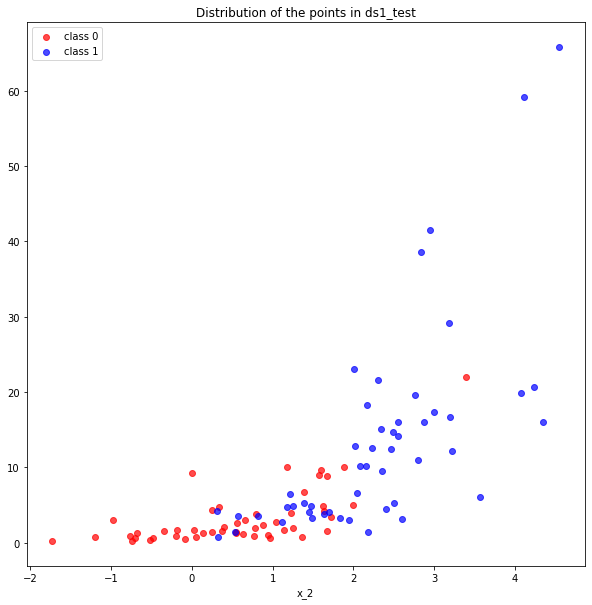

In [ ]:
plot_dist(X1_test, y1_test, title="Distribution of the points in ds1_test")
plt.savefig("test1")

Now, we use the trained model to classify new points.
Then we look at true positives and false negatives (cf confusion matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

preds1 = [round(x) for x in gda1.predict(X1_test)]

conf_mat1 = confusion_matrix(y1_test, preds1)
conf_mat1

array([[38, 12],
       [ 9, 41]])

Below is the representation of the model's predictions:

In [ ]:
plot_dist(X1_test, preds1, title="Classification of the testing set ds1_test by the GDA model")
plt.savefig("preds1")

### Importing the second dataset

All the next lines are exactly the same as for the first dataset

In [ ]:
df2_train = pd.read_csv('ds2_train.csv')
df2_test = pd.read_csv('ds2_test.csv')

# Training sets
X2_train = df2_train[["x_1","x_2"]]
y2_train = df2_train["y"]

# Testing sets
X2_test = df2_test[["x_1","x_2"]]
y2_test = df2_test["y"]

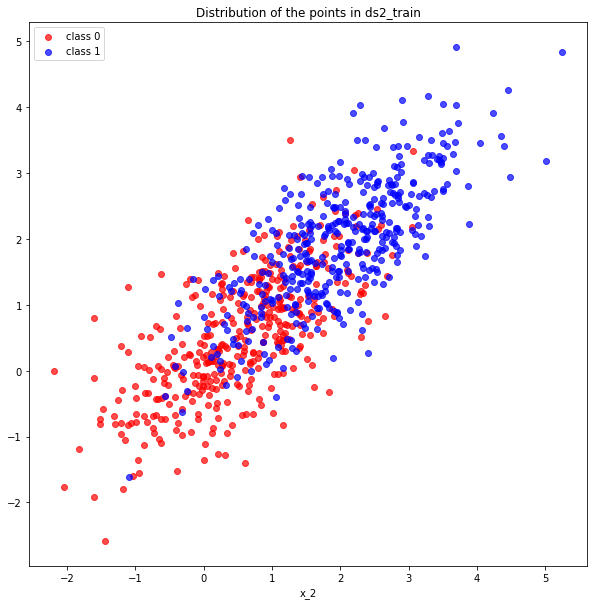

In [ ]:
plot_dist(X2_train, y2_train, title="Distribution of the points in ds2_train")
plt.savefig("dist2")

### Building the model on the second dataset

In [ ]:
gda2 = GDA()

gda2.fit(X2_train, y2_train)

### Evaluating the model on the second testing test

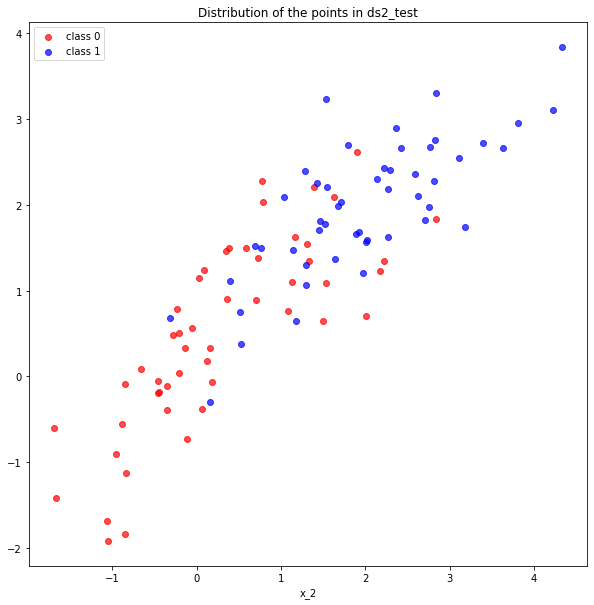

In [ ]:
plot_dist(X2_test, y2_test, title="Distribution of the points in ds2_test")
plt.savefig("test2")

In [ ]:
preds2 = [round(x) for x in gda2.predict(X2_test)]

conf_mat2 = confusion_matrix(y2_test, preds2)
conf_mat2

array([[37, 13],
       [ 9, 41]])

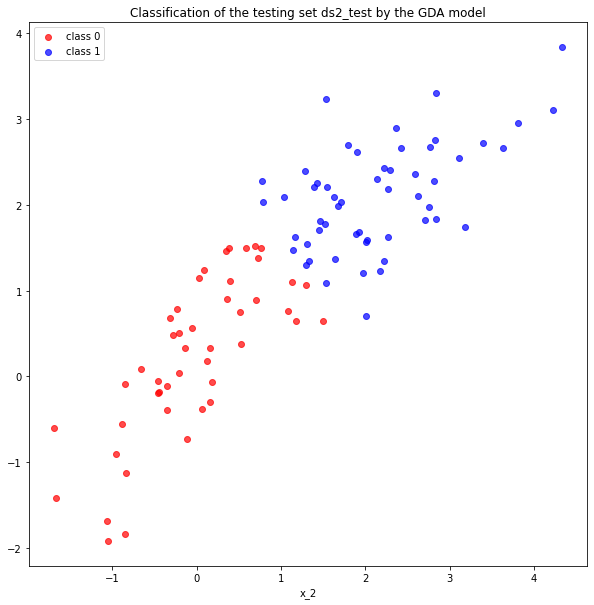

In [ ]:
plot_dist(X2_test, preds2, title="Classification of the testing set ds2_test by the GDA model")
plt.savefig("preds2")